In [120]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import os
import pandas as pd

## Do simulation

In [108]:
def do_simulation_bertrand(number_iterations, max_val, which_digit = 'first'):
    """
    Perform a simulation to compute occurences of leading digits.
    You have the choice between digits:
        - digit = 'first': returns the leading digit
        - digit = 'last' : returns the last digit
    """
    leading_digits = list()
    for iter in range(number_iterations):        
        # Add some randomness to the choice of your maximum value
        max_val_iter = np.random.randint(int(0.1 * max_val), int(1.5 * max_val))
        
        # Use the upper bound to simulate a random number
        upper_bound = np.random.randint(1, max_val_iter + 1)
        number = np.random.randint(1, upper_bound + 1)
        idx = 0 if which_digit == 'first' else -1
        leading_digits.append(int(str(number)[idx]))
    return leading_digits

In [109]:
max_val = 2 * 10 ** 6
number_iterations = 10 ** 5
which_digit = 'first'

leading_digits = do_simulation_bertrand(number_iterations, max_val, which_digit = which_digit)

#### Compute evolving statistics

In [110]:
stats = list()
for idx in range(0, len(leading_digits), 100):
    stats_idx = {i : 0 for i in range(1, 10)}
    counts = Counter(leading_digits[:(idx+1)])
    for key, val in counts.items():
        stats_idx[key] += val / (1 + idx)
    stats.append(stats_idx)
    
stats_plot = dict()
for digit in range(1, 10):
    stats_plot[digit] = [stats_idx[digit] for stats_idx in stats]

#### Visualize results

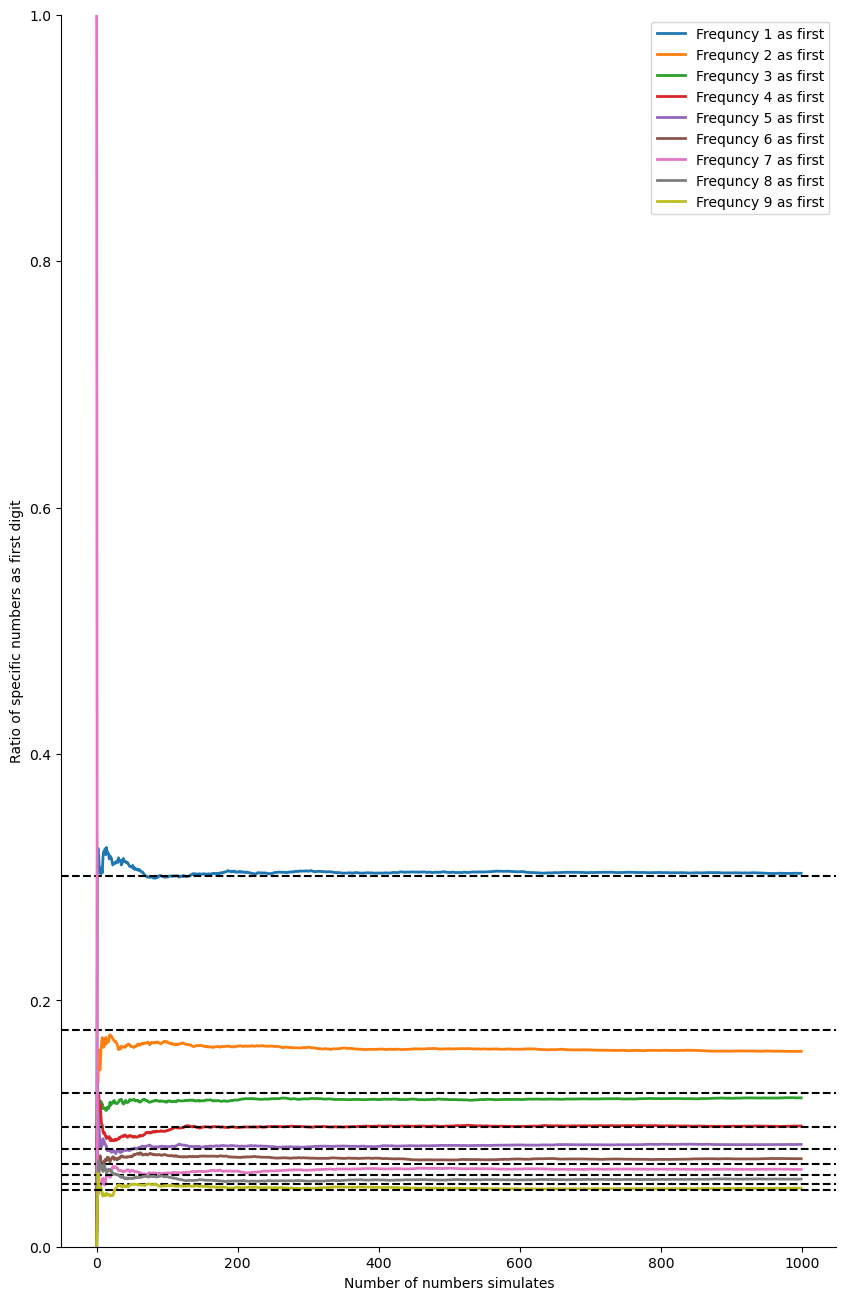

In [111]:
fig, ax = plt.subplots(figsize = (10, 16))

for digit in range(1, 10):
    ax.plot(stats_plot[digit], label = f"Frequncy {digit} as {which_digit}", lw = 2)
    ax.axhline(np.log10(1 + 1 / digit), color = 'k', ls = '--')
    
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim([0, 1])
ax.set_xlabel("Number of numbers simulates")
ax.set_ylabel(f"Ratio of specific numbers as {which_digit} digit")
#ax.set_yticklabels([0, '1/2', '2/3', 1])
    
ax.legend();

## Taking an online dataset

In [121]:
filename = os.path.join("data_ignoreme", "WLD_RTFP_mkt_2023-10-02.csv")
df = pd.read_csv(filename)

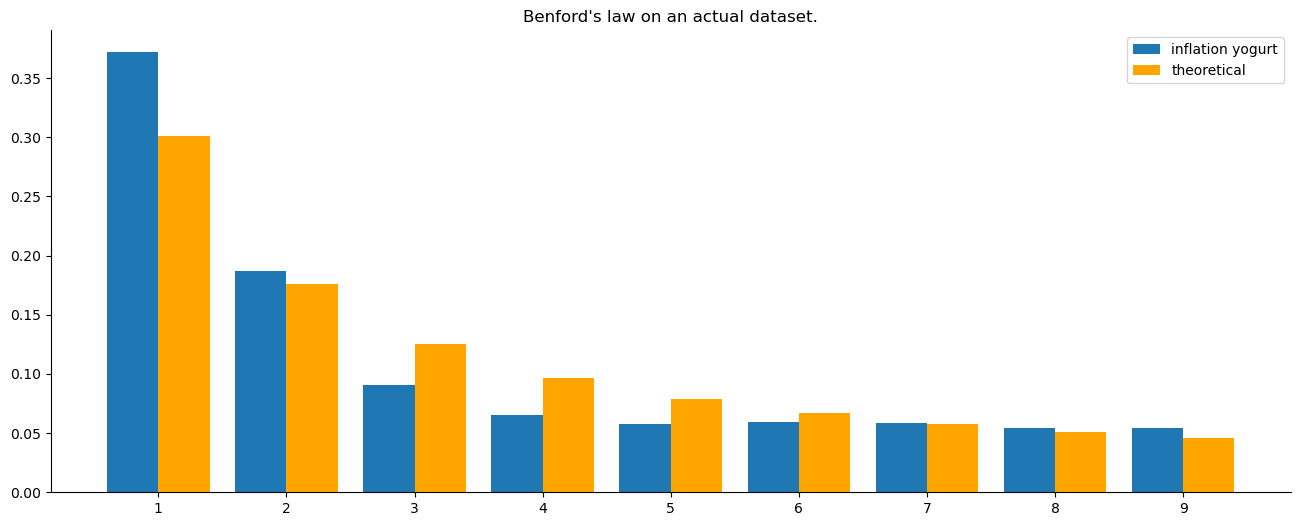

In [176]:
## Compute counts from dataset
colname = "inflation_yogurt"
counts = Counter(list(np.abs(df.inflation_yogurt[~df[colname].isnull()] * 10**20)
                    .astype(str)
                    .apply(lambda x : x[0])
                    .astype(int)))
del counts[0]
total_count = np.sum(list(counts.values()))
rel_counts = {
    key : value / total_count for key, value in counts.items()
}

## Compute theoretical counts
theory_counts = {
    digit : np.log10(1 + 1 / digit) for digit in range(1, 10)
}

fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(rel_counts.keys(), rel_counts.values(), width = 0.4, label = colname.replace('_', ' '))
ax.bar([val + 0.4 for val in theory_counts.keys()], theory_counts.values(), width = 0.4, color = 'orange', label = "theoretical")
ax.set_title("Benford's law on an actual dataset.")
ax.set_xticks([x + 0.2 for x in range(1, 10)])
ax.set_xticklabels(range(1, 10))
ax.legend()
ax.spines[['top', 'right']].set_visible(False)